In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

import os

os.chdir('C:/Users/dbda.STUDENTSDC/Desktop/M.L/Cases/')

In [2]:
wisconsin = pd.read_csv('Wisconsin/BreastCancer.csv', index_col=0)
wisconsin

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,Benign
63375,9,1,2,6,4,10,7,7,2,Malignant
76389,10,4,7,2,2,8,6,1,1,Malignant
95719,6,10,10,10,8,10,7,10,7,Malignant
128059,1,1,1,1,2,5,5,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...
1369821,10,10,10,10,5,10,10,10,7,Malignant
1371026,5,10,10,10,4,10,5,6,3,Malignant
1371920,5,1,1,1,2,1,3,2,1,Benign


In [4]:
le = LabelEncoder()
wisconsin['Class'] = le.fit_transform(wisconsin['Class'])
wisconsin

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,0
63375,9,1,2,6,4,10,7,7,2,1
76389,10,4,7,2,2,8,6,1,1,1
95719,6,10,10,10,8,10,7,10,7,1
128059,1,1,1,1,2,5,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1369821,10,10,10,10,5,10,10,10,7,1
1371026,5,10,10,10,4,10,5,6,3,1
1371920,5,1,1,1,2,1,3,2,1,0


In [5]:
x, y = wisconsin.drop('Class', axis=1), wisconsin['Class']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=25, stratify = y)

In [6]:
lr = LogisticRegression()

In [7]:
lr.fit(x_train, y_train)
lr.predict_proba(x_test)

array([[9.98120767e-01, 1.87923285e-03],
       [9.98229749e-01, 1.77025092e-03],
       [1.96481629e-04, 9.99803518e-01],
       [9.82482033e-01, 1.75179672e-02],
       [9.94408267e-01, 5.59173308e-03],
       [5.51665724e-01, 4.48334276e-01],
       [2.05397996e-03, 9.97946020e-01],
       [9.76178351e-01, 2.38216491e-02],
       [9.98597104e-01, 1.40289575e-03],
       [9.96557412e-01, 3.44258849e-03],
       [9.99275706e-01, 7.24293521e-04],
       [9.98134279e-01, 1.86572114e-03],
       [5.46197681e-04, 9.99453802e-01],
       [9.89788038e-01, 1.02119620e-02],
       [9.89788038e-01, 1.02119620e-02],
       [9.98903064e-01, 1.09693596e-03],
       [1.16178478e-01, 8.83821522e-01],
       [9.98911740e-01, 1.08825963e-03],
       [9.98911740e-01, 1.08825963e-03],
       [9.90375598e-01, 9.62440163e-03],
       [9.96542540e-01, 3.45746032e-03],
       [7.31077129e-01, 2.68922871e-01],
       [4.51767821e-04, 9.99548232e-01],
       [4.26536006e-02, 9.57346399e-01],
       [9.958841

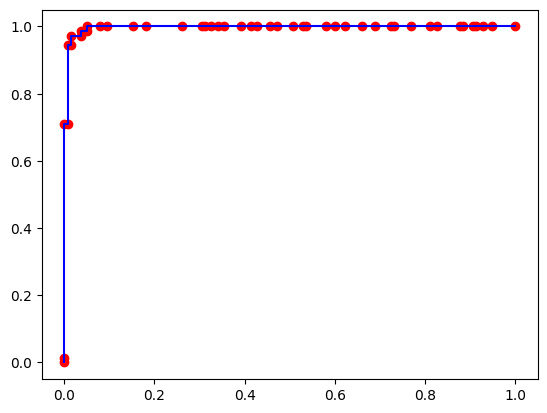

In [19]:
auc_score = roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])
tpr, fpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
plt.scatter(tpr, fpr, c = 'red')
plt.plot(tpr, fpr, c = 'blue')
plt.show()